In [1]:
%pip install graphviz -q

Note: you may need to restart the kernel to use updated packages.


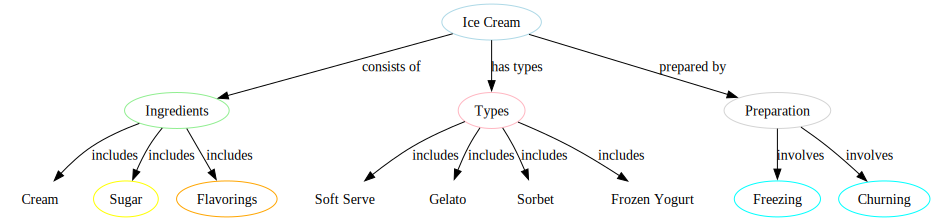

Here's a visual guide to understanding Ice Cream:

- At the core, we have **Ice Cream**, which consists of several key **Ingredients**: Cream, Sugar, and various Flavorings. These ingredients come together to form the delicious treat we all enjoy.
- **Ice Cream** can be categorized into different **Types**, such as Soft Serve, Gelato, Sorbet, and Frozen Yogurt. Each type has its unique characteristics and preparation methods.
- The **Preparation** of Ice Cream involves crucial steps like **Freezing** and **Churning** to achieve the desired texture and consistency.

This visual representation helps to simplify the concept of Ice Cream, from its basic ingredients to the various types available and the preparation process involved.

In [5]:
import warnings
from graphviz import Digraph
from pydantic import BaseModel, Field
from typing import List
from chatlab import Chat
from chatlab.decorators import incremental_display

class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = Field("black", description="A valid Graphviz color name or hex code.")

class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(..., default_factory=list)
    edges: List[Edge] = Field(..., default_factory=list)


def visualize_knowledge_graph(kg: KnowledgeGraph, comment: str = "Knowledge Graph"):
    """Visualizes a knowledge graph using graphviz."""
    if kg is None:
        return

    dot = Digraph(comment=comment)

    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    return dot


@incremental_display(visualize_knowledge_graph)
def store_knowledge_graph(kg: KnowledgeGraph, comment: str):
    """Creates a graphviz diagram for the user and stores it in their database."""
    return "Stored graph, visual shown"

chat = Chat(
    model="gpt-4-turbo-preview",
    chat_functions=[store_knowledge_graph],
)

await chat("Visually teach me about Ice Cream", temperature=0.7)

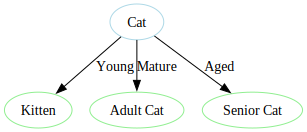

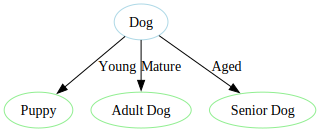

I have created two knowledge graphs, one about cats and one about dogs. 

### Cat Knowledge Graph:
- **Cat**
  - Young: Kitten
  - Mature: Adult Cat
  - Aged: Senior Cat

### Dog Knowledge Graph:
- **Dog**
  - Young: Puppy
  - Mature: Adult Dog
  - Aged: Senior Dog

These graphs illustrate the life stages of cats and dogs, from their early years to maturity and old age.

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    await chat("Ok now make two knowledge graphs. One about cats and one about dogs.")